![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)


# **Scaling, Re-sizing, Interpolations and Cropping**

**In this lesson we'll learn:**
1. How to re-size and scale images
2. Image Pyramids
3. Cropping

# 1. **Re-sizing va Scaling**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- Agar dsize  None berilsa output uchun, rasm x va y funksiyasi boyicha hisoblanib resize qilinadi

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Qisqartirish yoki namuna olish uchun yaxshi
- cv2.INTER_NEAREST - Eng tezi
- cv2.INTER_LINEAR - Kattalashtirish yoki namuna olish uchun yaxshi (standart)
- cv2.INTER_CUBIC - Yaxshiroq
- cv2.INTER_LANCZOS4 - Zo'ri Best

Batafsil maqola misollari bilan - https://chadrick-kwag.net/cv2-resize-interpolation-methods/

In [3]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# # Download and unzip our images
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
# !unzip -qq images.zip

## Scaling and resizing methods 
## Scaling - rasmni aspect rationi saqlab kattalashtirish. Agar cv2.resize ga olcham bermasak scaling qiladi
## Re-size o'lcham orqali ixtiyoriy kichiklashtirish

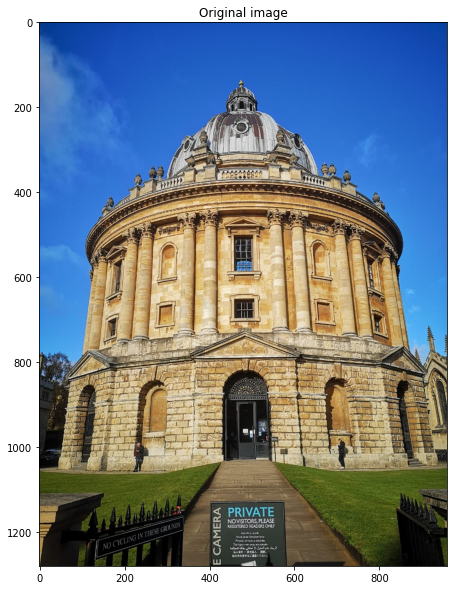

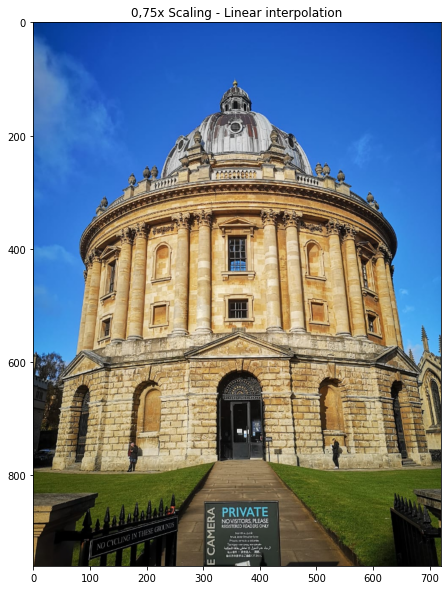

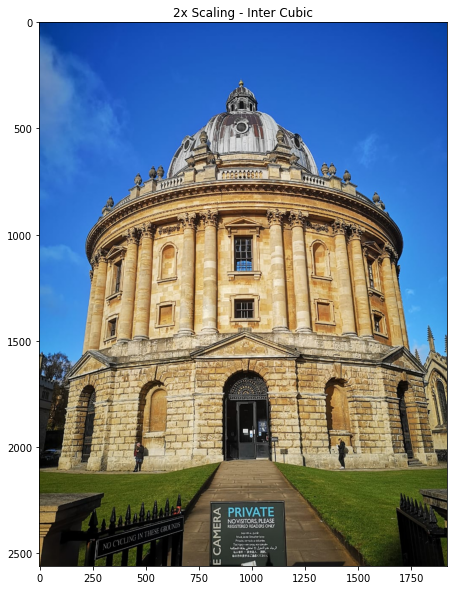

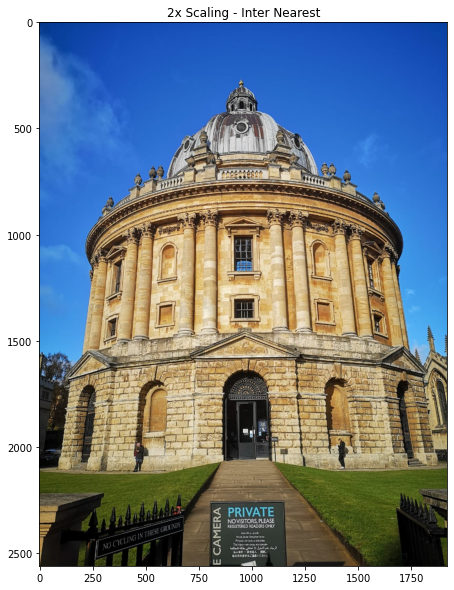

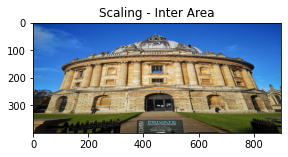

In [12]:
#load image 
image = cv2.imread('Datasets/images/oxfordlibrary.jpeg')
imshow('Original image', image) 

#Agar no interpolation berilsa, default holatda cv2.INTER_LINEAR tanlanadi
#Rasmimizni 0,75 foiz barobargacha x va y oqi boyicha resize qilyapmiz lekin orginal sizesida 
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75) #None - dsize - kichraytiriladigon size berilmagan
imshow("0,75x Scaling - Linear interpolation", image_scaled)

# Ikki barobar oshirib koramiz cv2.INTER_CUBIC boyciha
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

#  Ikki barobar oshirib koramiz  inter_nearest interpolation boyicha
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

# Aniq razmer berib resize qilib koramiz. Inter_area boyicha
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)



# 2 **Image Pyraminds** 

### tezkor rasmni double, half , quarter va hokazoda olchamda nx barobarida scale yoki resize qilish usuli

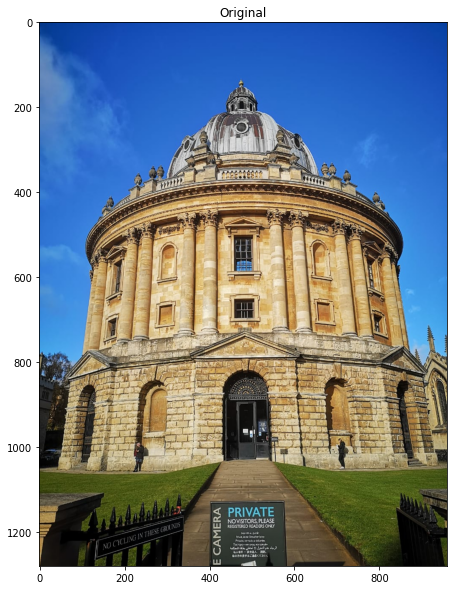

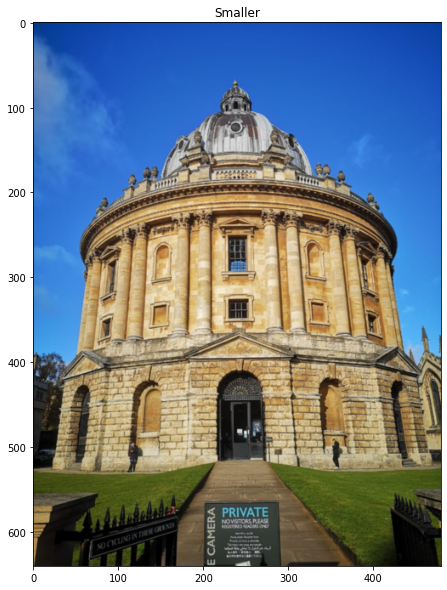

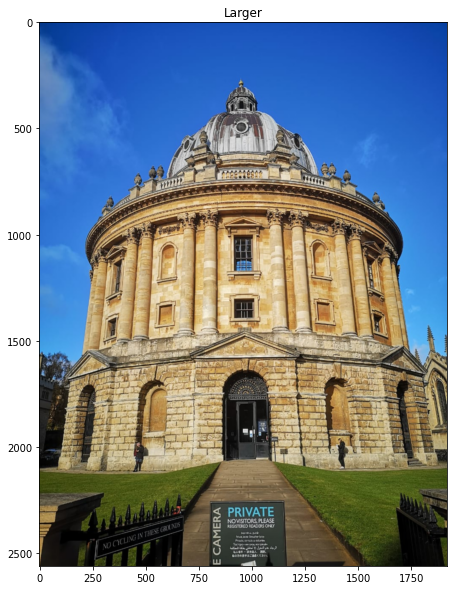

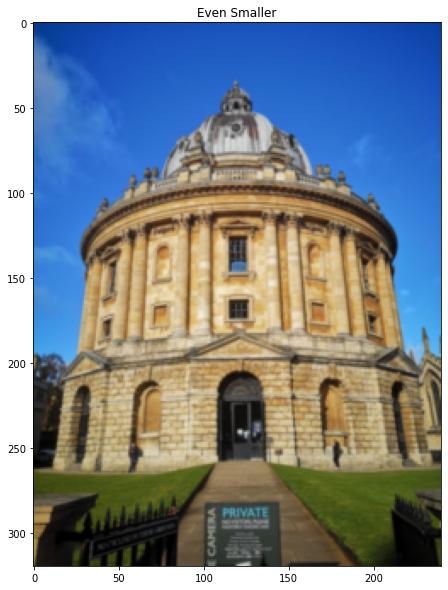

In [14]:
image = cv2.imread('Datasets/images/oxfordlibrary.jpeg')

#o'lcham bermasak scaling qiladi. Yani nisbat saqlagan holatda oshiradi yoki kamaytiradi
smaller = cv2.pyrDown(image, dst=None) 
larger = cv2.pyrUp(image)

imshow("Original", image)
imshow('Smaller', smaller)
imshow('Larger', larger)

#Small bo'lgani yana ham kichraytirish
even_smaller = cv2.pyrDown(smaller)
imshow('Even Smaller', even_smaller)

# 3 **Cropping** - qirqish 

320 240
960 720


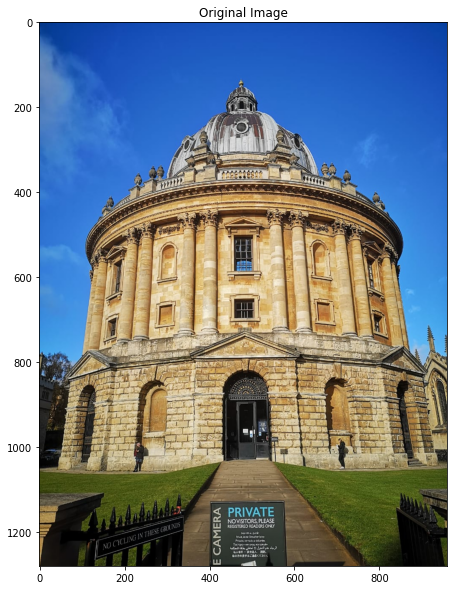

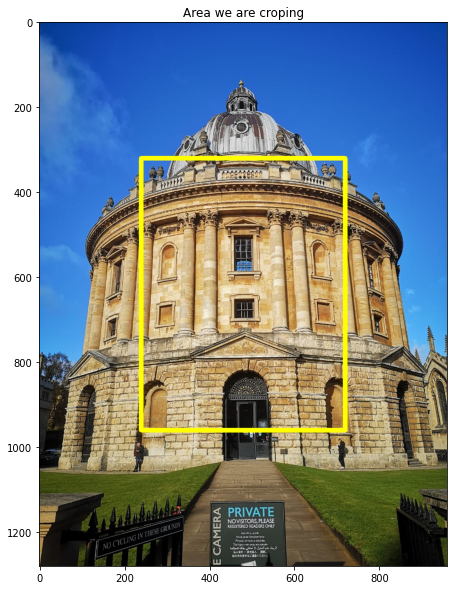

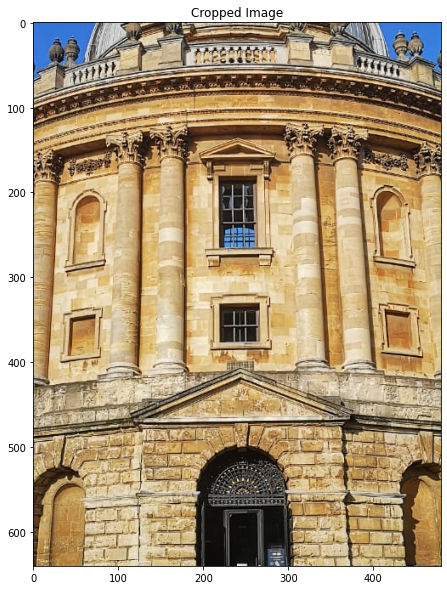

In [21]:
image = cv2.imread('Datasets/images/oxfordlibrary.jpeg')

# Get our image dimensions
height, width = image.shape[:2]


#0.25 ni ya'ni 1/4 barobar pastda from the top left (0,0) nuqtadagi kordinatalarni tanlab oldik. 
start_row, start_col = int(height * .25), int(width * .25)
print(start_row, start_col)

#Ending pixel pointlarni belgilab oldik. (Bottom right tarafdan)
end_row, end_col = int(height * .75), int(width * .75)
print(end_row, end_col)

#Python slicing orqali kesib olamiz. 
cropped = image[start_row:end_row , start_col:end_col]

imshow("Original Image", image)

# cv2.rectangle function draws a rectangle over our image (in-place operation)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)

imshow("Area we are croping", copy)

imshow("Cropped Image", cropped) 